In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
# Importing the data.

one0 = pd.read_excel('../data/processed/one/one 0.xlsx')
one1 = pd.read_excel('../data/processed/one/one 1.xlsx')
one2 = pd.read_excel('../data/processed/one/one 2.xlsx')
cnss = pd.read_excel('../data/processed/cnss/cnss 0.xlsx')
one3 = pd.read_excel('../data/raw/pending/cápitas-régimen-contributivo-sfs-afiliado-mes-dispersión-2012-2023.xlsx')
poverty_rate = pd.read_excel('../data/raw/one/indice de pobreza.xlsx')
poverty_rate.columns = [column.lower() for column in poverty_rate.columns]

# Exploration

In [6]:
def calculate_pct(numerator: int | pd.Series | list, denominator: int | pd.Series | list) -> int | pd.Series | list:
    return round((numerator/denominator) * 100, 2)

In [4]:
print(one0.columns)
one0.head()

Index(['Unnamed: 0', 'año', 'afiliados (total)', 'afiliados (subsidiado)',
       'afiliados (contributivo)', 'numero de cápitas pagadas (total)',
       'numero de cápitas pagadas (subsidiado)',
       'numero de cápitas pagadas (contributivo)',
       'número de cápitas /afiliado (total)',
       'número de cápitas /afiliado (subsidiado)',
       'número de cápitas /afiliado (contributivo)'],
      dtype='object')


,Unnamed: 0,año,afiliados (total),afiliados (subsidiado),afiliados (contributivo),numero de cápitas pagadas (total),numero de cápitas pagadas (subsidiado),numero de cápitas pagadas (contributivo),número de cápitas /afiliado (total),número de cápitas /afiliado (subsidiado),número de cápitas /afiliado (contributivo)
0,1,2005,253374,253374,0,266531,266531,0,1.051927,1.051927,0.000000
1,2,2006,514040,514040,0,513416,513416,0,0.998786,0.998786,0.000000
2,3,2007,2559117,1081936,1477181,2681403,1081936,1599467,1.047784,1.000000,1.082783
3,4,2008,2917157,1224898,1692259,2954314,1224643,1729671,1.012737,0.999792,1.022108
4,5,2009,3492524,1404225,2088299,3442398,1346166,2096232,0.985648,0.958654,1.003799


# First data set

In [ ]:
afiliados (total)

## Number of affiliates

Mean48.24, std: 16.99753095245107


<Axes: ylabel='Count'>

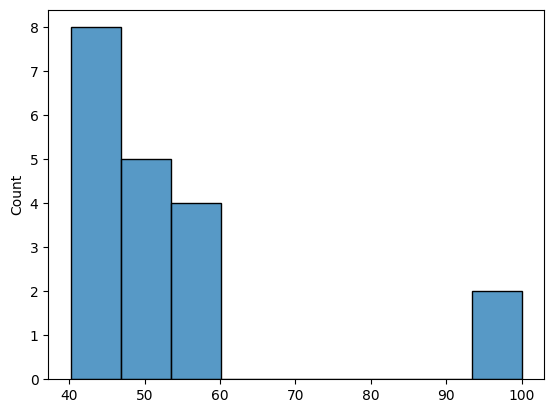

In [14]:
subsidy = calculate_pct(one0['afiliados (subsidiado)'], one0['afiliados (total)'])

print(f'Mean{subsidy.median()}, std: {subsidy.std()}')
sns.histplot(subsidy)

Mean51.76, std: 16.99753095245107


<Axes: ylabel='Count'>

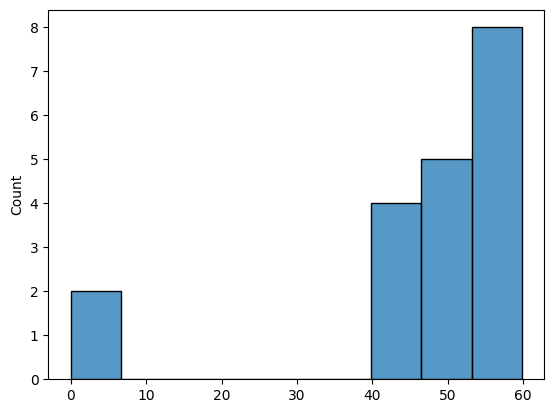

In [15]:
contributed = calculate_pct(one0['afiliados (contributivo)'], one0['afiliados (total)'])

print(f'Mean{contributed.median()}, std: {contributed.std()}')
sns.histplot(contributed)

<Axes: xlabel='año', ylabel='None'>

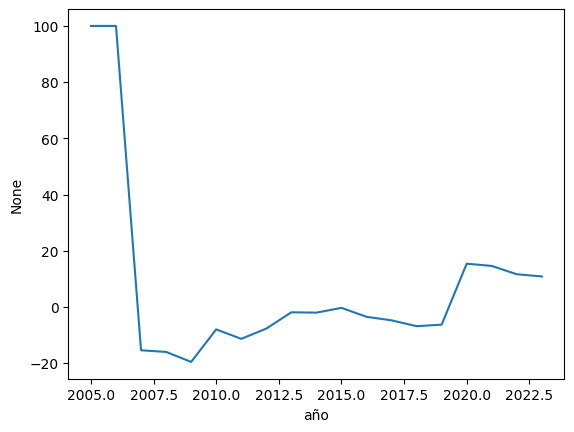

In [18]:
sns.lineplot(
    y=subsidy - contributed,
    x=one0['año'] 
)

## Number of capitations paid

Mean45.85, std: 26.209271807033687


<Axes: ylabel='Count'>

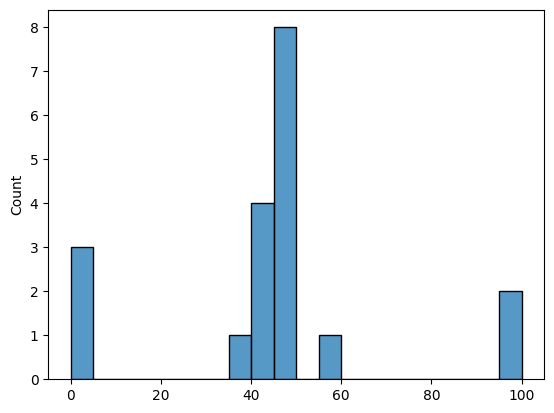

In [24]:
subsidy = calculate_pct(one0['numero de cápitas pagadas (subsidiado)'], one0['numero de cápitas pagadas (total)'])

print(f'Mean{subsidy.median()}, std: {subsidy.std()}')
sns.histplot(subsidy)

Mean54.15, std: 26.209271807033687


<Axes: ylabel='Count'>

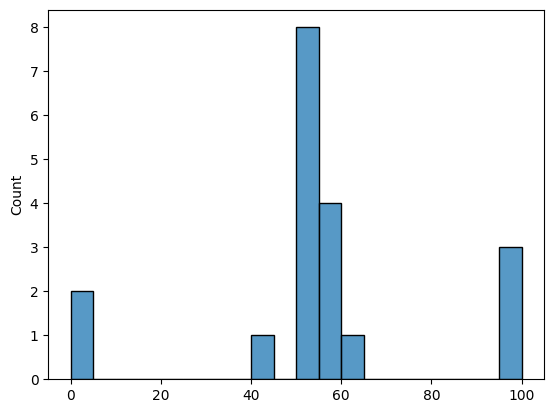

In [25]:
contributed = calculate_pct(one0['numero de cápitas pagadas (contributivo)'], one0['numero de cápitas pagadas (total)'])

print(f'Mean{contributed.median()}, std: {contributed.std()}')
sns.histplot(contributed)

<Axes: xlabel='año', ylabel='None'>

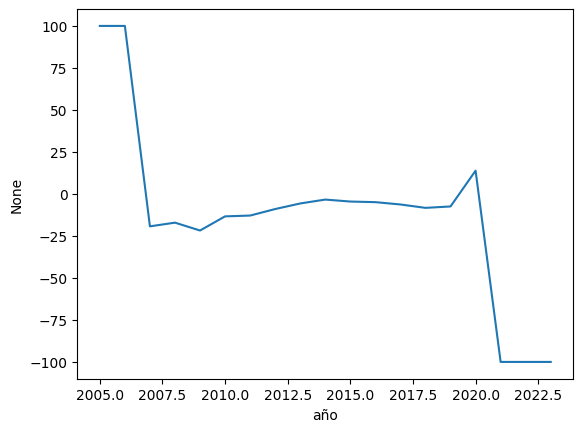

In [26]:
sns.lineplot(
    y=subsidy - contributed,
    x=one0['año'] 
)

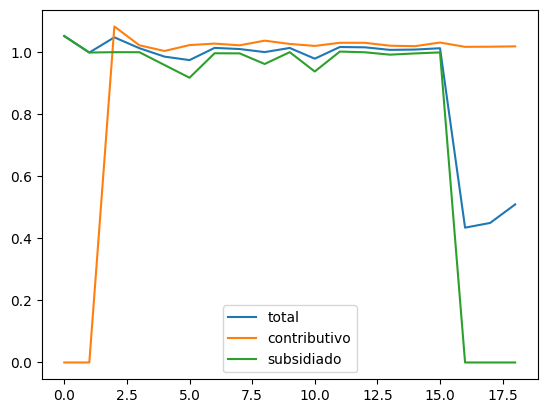

In [32]:
fig, ax = plt.subplots()

ax.plot(one0['número de cápitas /afiliado (total)'])
ax.plot(one0['número de cápitas /afiliado (contributivo)'])
ax.plot(one0['número de cápitas /afiliado (subsidiado)'])

plt.legend(['total', 'contributivo', 'subsidiado',])

In [74]:
poverty_rate_general = poverty_rate.loc[poverty_rate['condición de pobreza'].str.strip() == 'General'].drop(columns=['condición de pobreza'])

<Axes: >

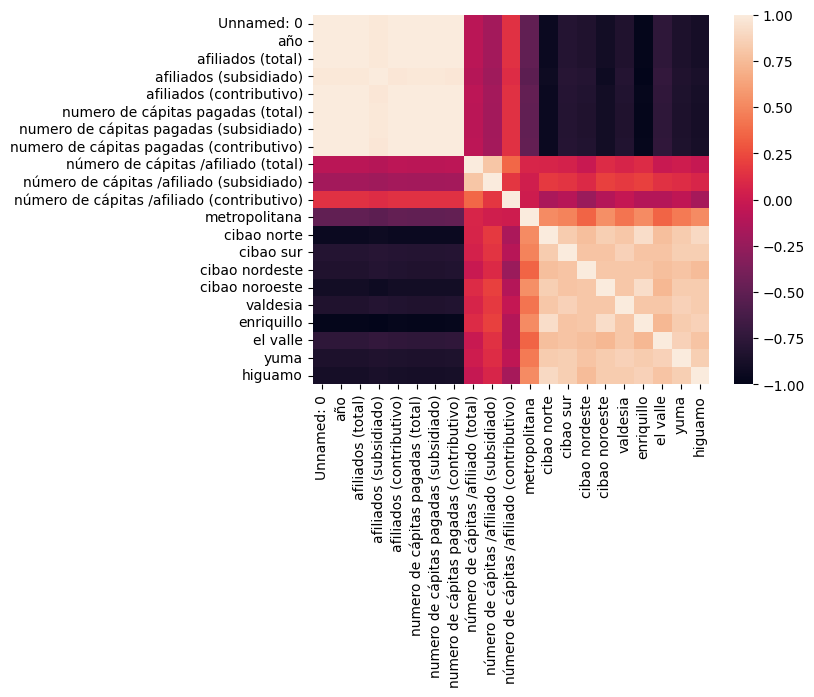

In [69]:
sns.heatmap(pd.merge(one0, poverty_rate_general, on='año').corr(method='kendall'))

# Second Data set

In [78]:
print(one1.columns)
one1

Index(['Unnamed: 0', 'año', 'total  (total )', 'total  (hombres)',
       'total  (mujeres)', 'régimen subsidiado (total )',
       'régimen subsidiado (hombres )', 'régimen subsidiado (mujeres )',
       'régimen contributivo (total )', 'régimen contributivo (hombres )',
       'régimen contributivo (mujeres )'],
      dtype='object')


,Unnamed: 0,año,total (total ),total (hombres),total (mujeres),régimen subsidiado (total ),régimen subsidiado (hombres ),régimen subsidiado (mujeres ),régimen contributivo (total ),régimen contributivo (hombres ),régimen contributivo (mujeres )
0,1,2007,2559117,1272227,1286890,1081936,479821,602115,1477181,792406,684775
1,2,2008,2916902,1435763,1481139,1224643,545438,679205,1692259,890325,801934
2,3,2009,3492524,1694440,1798084,1404225,615631,788594,2088299,1078809,1009490
3,4,2010,4377869,2114762,2263107,2013786,904636,1109150,2364083,1210126,1153957
4,5,2011,4520850,2178591,2342259,2003427,899174,1104253,2517423,1279417,1238006
5,6,2012,4991762,2392155,2599607,2303351,1031367,1271984,2688411,1360788,1327623
6,7,2013,5652729,2705832,2946897,2751753,1243431,1508322,2900976,1462401,1438575
7,8,2014,6157245,2978843,3178402,3015646,1400518,1615128,3141599,1578325,1563274
8,9,2015,6657243,3247604,3409639,3317405,1572793,1744612,3339838,1674811,1665027
9,10,2016,6938356,3384848,3553508,3347068,1575598,1771470,3591288,1809250,1782038


In [79]:
calculate_pct( one1['total  (hombres)'], one1['total  (total )'])

0     49.71
1     49.22
2     48.52
3     48.31
4     48.19
5     47.92
6     47.87
7     48.38
8     48.78
9     48.78
10    49.07
11    48.99
12    48.83
13    49.80
14    49.82
15    49.83
16    49.77
dtype: float64

In [80]:
calculate_pct( one1['total  (mujeres)'], one1['total  (total )'])

0     50.29
1     50.78
2     51.48
3     51.69
4     51.81
5     52.08
6     52.13
7     51.62
8     51.22
9     51.22
10    50.93
11    51.01
12    51.17
13    50.20
14    50.18
15    50.17
16    50.23
dtype: float64